# WEB SCRAPING 

In [29]:
# Importing the necessary libraries.
from bs4 import BeautifulSoup 
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from datetime import datetime
import requests
import time
import re
import pandas as pd
import requests
import time
import nltk


### Obtaining the URL Link of the first page 

In [30]:
search_url =  "https://helpjuice.com/blog"
r = requests.get(search_url)
soup = BeautifulSoup(r.text, 'html.parser')
blogs = soup.find_all('div', class_ = 'post')

### Getting the blog names and blog links 

In [32]:
links =[]
blog_names = []
for blog in blogs:
    blog_name = blog.h3.text
    blog_link = blog.a['href']
    print(f'blog_name : {blog_name}')
    print(f'blog_link : {blog_link}')
    links.append(blog_link) 
    blog_names.append(blog_name)


blog_name : Encourage Knowledge Sharing in the Workplace [6 Steps to Help]
blog_link : /blog/knowledge-sharing
blog_name : How to Create an Employee Training Plan [With Templates + Checklists]
blog_link : /blog/employee-training-plan-templates
blog_name : Customer Self-Service Software Guide: The Best Tools for 2022
blog_link : /blog/customer-self-service-software
blog_name : Knowledge Base Guide: Why Your Business Needs One (2022)
blog_link : /blog/knowledge-base
blog_name : Business Requirements Document: What it is & How to Write One
blog_link : /blog/business-requirements-document
blog_name : Customer Service Performance Reviews: Processes + Template
blog_link : /blog/customer-service-performance-reviews
blog_name : How to Create a Training Manual: Tips for Maximizing Impact
blog_link : /blog/training-manual
blog_name : How to Deliver 24/7 Customer Service & Tech Support 
blog_link : /blog/24-7-customer-service
blog_name : The Best Knowledge Management Software & Tools [2022]
blog_

### Iterating over the links and finding the Author Names , Date Published and it's content.

In [21]:
paras = []
Author =[]
date = []
for link in links:
    s = "https://helpjuice.com/"+link
    r = requests.get(s)
    soup = BeautifulSoup(r.text, 'html.parser')
    blog_Author = soup.h4.text
    blog_date = soup.span.text
    para = soup.article.text
    paras.append(para)
    Author.append(blog_Author)
    date.append(blog_date)
print(paras)
print(Author)
print(date)
    

["\nKnowledge sharing is the process of sharing organizational knowledge (both tacit as well as explicit) with other members within your company.\xa0Why does this matter?Because, the collective knowledge possessed by all the members within your organization is one of your company’s most valuable assets.It’s what enables your individual employees to do their job well.It’s what ensures your overall operations run smoothly and effectively.It also provides your business with a competitive edge.Overall, it’s what separates your business from other businesses — and what allows you to provide value to your customers in the way you do.Of course, your team’s collective knowledge can only become collective if your employees actively and consistently share it with one another.\xa0Unfortunately, it can be very difficult to persuade your employees to share their knowledge – especially if you don’t have the right culture in place first. The failure of creating and implementing a knowledge sharing cu

### Removing the stopwords by lemmatizing the paragraph so that we can use the words to find the keywords.

In [33]:
def text_preprocess_output(sentence):
    lemmatizer = WordNetLemmatizer()

    for i in range(len(sentence)):
        words = re.sub('[^a-zA-Z]', ' ', sentence[i]) 
        words = words.lower()
        words = words.split()
        words = [lemmatizer.lemmatize(word) for word in words if not word in stopwords.words('english')]
        sentence[i] = ' '.join(words)
        

In [34]:
text_preprocess_output(paras)

### Prints the top 3 words in each blogs 

In [35]:
for i in paras:
    words_inb_log = i.split()
    df = pd.DataFrame(words_inb_log)
    top3 = df.value_counts()[:3]
    print(f'top3 kewords: {top3}')   

top3 kewords: knowledge    144
sharing       69
employee      36
dtype: int64
top3 kewords: training    81
template    47
employee    37
dtype: int64
top3 kewords: customer    136
service      94
self         48
dtype: int64
top3 kewords: knowledge    155
base         127
customer      59
dtype: int64
top3 kewords: project     71
business    45
document    32
dtype: int64
top3 kewords: performance    54
review         53
service        48
dtype: int64
top3 kewords: training    87
manual      84
audience    24
dtype: int64
top3 kewords: customer    117
support      43
service      41
dtype: int64
top3 kewords: knowledge     54
management    37
team          31
dtype: int64
top3 kewords: service     64
customer    42
team        41
dtype: int64
top3 kewords: change        97
team          32
management    25
dtype: int64
top3 kewords: customer    96
support     84
team        31
dtype: int64


In [36]:
ls =[]
for i in paras:
    words_inb_log = i.split()
    df = pd.DataFrame(words_inb_log)
    d = df.value_counts()[:3].reset_index(name='col')[0]
    ls.append(d)

In [37]:
ls

[0    knowledge
 1      sharing
 2     employee
 Name: 0, dtype: object,
 0    training
 1    template
 2    employee
 Name: 0, dtype: object,
 0    customer
 1     service
 2        self
 Name: 0, dtype: object,
 0    knowledge
 1         base
 2     customer
 Name: 0, dtype: object,
 0     project
 1    business
 2    document
 Name: 0, dtype: object,
 0    performance
 1         review
 2        service
 Name: 0, dtype: object,
 0    training
 1      manual
 2    audience
 Name: 0, dtype: object,
 0    customer
 1     support
 2     service
 Name: 0, dtype: object,
 0     knowledge
 1    management
 2          team
 Name: 0, dtype: object,
 0     service
 1    customer
 2        team
 Name: 0, dtype: object,
 0        change
 1          team
 2    management
 Name: 0, dtype: object,
 0    customer
 1     support
 2        team
 Name: 0, dtype: object]

### Storing the top 3 key words as a list 

In [38]:
l = []
for i in ls:
        w = ' '.join(i)
        l.append(w)
print(l)        

['knowledge sharing employee', 'training template employee', 'customer service self', 'knowledge base customer', 'project business document', 'performance review service', 'training manual audience', 'customer support service', 'knowledge management team', 'service customer team', 'change team management', 'customer support team']


In [39]:
l

['knowledge sharing employee',
 'training template employee',
 'customer service self',
 'knowledge base customer',
 'project business document',
 'performance review service',
 'training manual audience',
 'customer support service',
 'knowledge management team',
 'service customer team',
 'change team management',
 'customer support team']

### Spliting the name and storing it in a list

In [14]:
Blog_author =[]
for i in Author:
    Blog_author.append(i.split(":")[1])
print(Blog_author)    


[' Josh Brown', ' Josh Brown', ' Josh Brown', ' Josh Brown', ' Josh Brown', ' Josh Brown', ' Josh Brown', ' Josh Brown', ' Josh Brown', ' Josh Brown', ' Josh Brown', ' Josh Brown']


### Spliting the date and storing in a list

In [15]:
Blog_date =[]
for i in date:
    Blog_date.append(i.split(":")[1])
print(Blog_date)    

[' May 17 2022', ' May 16 2022', ' May 12 2022', ' May 10 2022', ' May 03 2022', ' April 30 2022', ' April 23 2022', ' April 12 2022', ' April 11 2022', ' April 07 2022', ' March 29 2022', ' March 25 2022']


In [16]:
l

['knowledge sharing employee',
 'training template employee',
 'customer service self',
 'knowledge base customer',
 'project business document',
 'performance review service',
 'training manual audience',
 'customer support service',
 'knowledge management team',
 'service customer team',
 'change team management',
 'customer support team']

In [40]:
def convertdate(dstring):
      return datetime.strptime(dstring, ' %B %d %Y')
df = pd.DataFrame(Blog_date)
df


,0
0,May 17 2022
1,May 16 2022
2,May 12 2022
3,May 10 2022
4,May 03 2022
5,April 30 2022
6,April 23 2022
7,April 12 2022
8,April 11 2022
9,April 07 2022


In [41]:
df["Title"] = blog_names
df['Author'] = Blog_author
df['date'] = df[0].apply(lambda x: convertdate(x))
df['key_words'] = l 
df['paras'] = paras


del df[0]
df

,Title,Author,date,key_words,paras
0,Encourage Knowledge Sharing in the Workplace [...,Josh Brown,2022-05-17,knowledge sharing employee,knowledge sharing process sharing organization...
1,How to Create an Employee Training Plan [With ...,Josh Brown,2022-05-16,training template employee,think agree effective employee training crucia...
2,Customer Self-Service Software Guide: The Best...,Josh Brown,2022-05-12,customer service self,one crucial facet business matter industry nic...
3,Knowledge Base Guide: Why Your Business Needs ...,Josh Brown,2022-05-10,knowledge base customer,collective knowledge employee thing like organ...
4,Business Requirements Document: What it is & H...,Josh Brown,2022-05-03,project business document,success business world never guaranteed chance...
5,Customer Service Performance Reviews: Processe...,Josh Brown,2022-04-30,performance review service,customer chat email call service desk reaching...
6,How to Create a Training Manual: Tips for Maxi...,Josh Brown,2022-04-23,training manual audience,training manual classic piece instructional li...
7,How to Deliver 24/7 Customer Service & Tech Su...,Josh Brown,2022-04-12,customer support service,customer said loud clear want company buy spee...
8,The Best Knowledge Management Software & Tools...,Josh Brown,2022-04-11,knowledge management team,invested amount time knowledge management with...
9,Guide to Optimizing Internal Customer Service:...,Josh Brown,2022-04-07,service customer team,riddle get mix cross team collaboration killer...


In [44]:
df.loc[:,['Title','Author','date','key_words']].to_excel('blog_data_p1.xlsx' ,index=False)

### Checking the condition for building the word cloud 

In [42]:
months = df[(df['date']>'2020-12-31') & (df['date']<'2022-04-01')]

months

,Title,Author,date,key_words,paras
10,Change Management Process: 7 Steps to Successf...,Josh Brown,2022-03-29,change team management,business world really world general change tru...
11,How to Scale Your Customer Support Efforts as ...,Josh Brown,2022-03-25,customer support team,delivering top notch customer support essentia...


### WORD CLOUD

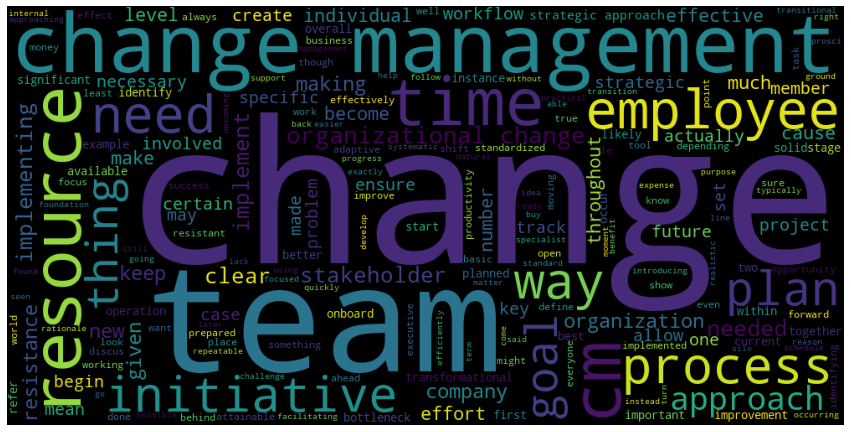

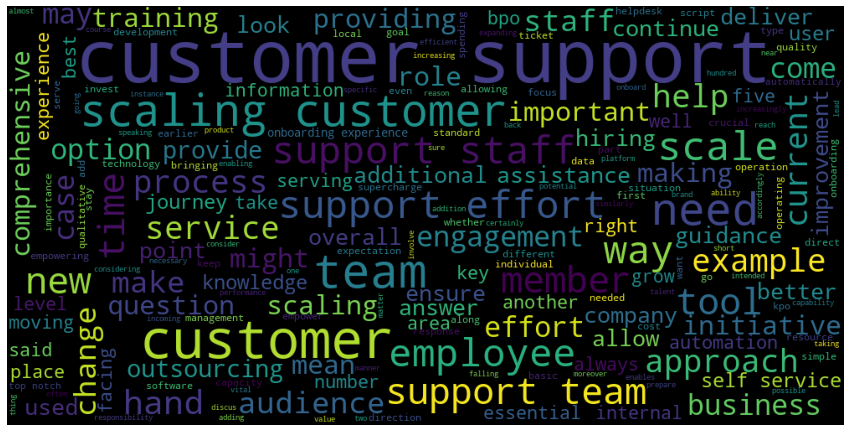

In [43]:

import matplotlib.pyplot as plt
from wordcloud import WordCloud
for i in months['paras']:
    wordcloud = WordCloud(width = 1000, height = 500).generate(i)
    plt.figure(figsize=(15,8))
    plt.imshow(wordcloud)
    plt.axis("off")
    #plt.savefig("your_file_name"+".png", bbox_inches='tight')
    plt.show()
    #plt.close()